# Theorie / Modell zum 4f Aufbau

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from raytrace_functions import trace_rays_in_system

## 1. Optische Abbildung und Maßstab

Machen Sie sich mit dem Python Code zum Raytracing im Versuchsaufbau vertraut. Überzeugen Sie sich davon, dass das System eine optische Abbildung ermöglicht.


In [2]:
ray_data = trace_rays_in_system(np.zeros((1, 3)), np.array([[0.1, 0.0, 1.0]]))
print(ray_data)

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [2.12031738e+00 0.00000000e+00 2.81981738e+01]
  [2.21193117e+00 0.00000000e+00 4.03168631e+01]
  [2.88763219e+00 0.00000000e+00 4.19694587e+01]
  [2.97401334e+00 0.00000000e+00 6.41700000e+01]
  [3.53517147e+00 0.00000000e+00 2.14238119e+02]
  [3.47619708e+00 0.00000000e+00 2.19779328e+02]
  [3.46552982e+00 0.00000000e+00 2.22039624e+02]
  [7.96557619e-02 0.00000000e+00 3.94141000e+02]]]


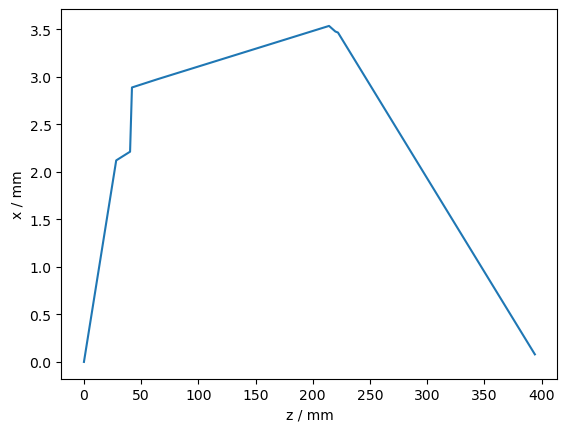

In [3]:
fig, ax = plt.subplots()
ax.plot(ray_data[0,:,2], ray_data[0,:,0])
ax.set_xlabel("z / mm")
ax.set_ylabel("x / mm")
plt.show()

Welche Freiheitsgrade des Systems sind für eine scharfe Abbildung zu wählen? Auf welche Veränderungen reagiert die Abbildungsqualität besonders sensibel?


In [4]:
from raytrace_functions import calc_contrast
from projection_optics import get_rayoptics_model as get_pob

C:\Users\Y1TSCHWE\AppData\Local\Temp\ipykernel_19104\2164939583.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


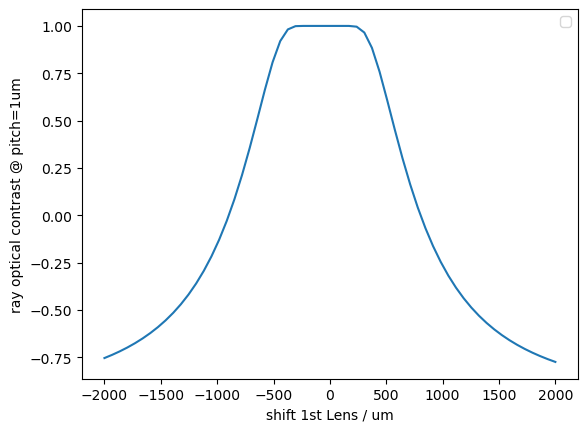

In [11]:

shift_in_mm = np.linspace(-2, 2, 60)
contrast_at_50um = np.zeros_like(shift_in_mm)

for i, shift in enumerate(shift_in_mm):
    sm = get_pob(shift, flip_first_lens=True)
    contrast_at_50um[i] = calc_contrast(sm, 50e-3)


fig, ax = plt.subplots()
ax.plot(1e3 * shift_in_mm, contrast_at_50um)
ax.set_xlabel("shift 1st Lens / um")
ax.set_ylabel("ray optical contrast @ pitch=1um")
ax.legend()
plt.show()

Finden Sie eine Formel für den Abbildungsmaßstab des Systems. Stimmt der Wert mit den experimentellen Messungen überein?


## Auflösungsgrenze
Machen Sie sich mit der Abbe’schen Formel für die Auflösungsgrenze eines optischen Systems vertraut. Welche Annahmen werden hier bezüglich der Qualität des Objektivs getroffen? 

Berechnen Sie mithilfe des Bereitgestellten Python Notebooks die Fourier Transformierte eines Gitters mit einer Gitterkonstanten von 10um. Welches Bild druckt unser optisches System für verschiedene Einstellungen der Blende? Wie sähe das Bild für ein optisches System mit größerer NA aus?


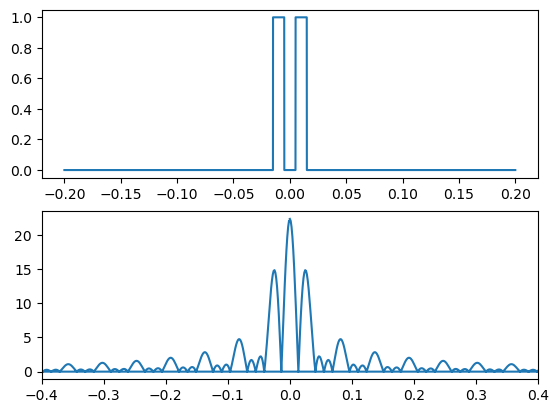

In [55]:

def slit(x, x0, w):
    return np.where(np.abs(x-x0) < w / 2, 1, 0)

def fft_on_grid(x, y, inverse=False):
    if inverse:
        fft_y = np.fft.ifft(y, norm="ortho")
    else:
        fft_y = np.fft.fft(y, norm="ortho")
    domain = np.max(x) - np.min(x)
    dx = domain/len(x)
    k = np.fft.fftfreq(len(x), d=dx)
    if inverse:
        k = np.fft.ifftshift(k)
    return k, fft_y

wl = 550e-6 # mm
x = np.linspace(-0.2, 0.2, int(2e5))
d = 0.02
w = d / 2

double_slit = slit(x, -d / 2, w) + slit(x, +d / 2, w)
grid = np.zeros_like(x)

object = double_slit
k, fft = fft_on_grid(x / wl, object)

fig, ax = plt.subplots(2)
ax[0].plot(x, object)
ax[1].plot(k, np.abs(fft))
ax[1].set_xlim(-0.4, 0.4)
plt.show()